In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-02 17:35:13.331405: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 17:35:13.361037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 17:35:13.811685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_ind', 'Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_rosa_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']
  
dados = dados[['Ano','Cam_rosa_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_rosa_ind'] = dados.loc[i,'Cam_rosa_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_rosa_ind'].values
dados.head()



/tmp/ipykernel_5629/1872416418.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']


,Ano,Cam_rosa_ind,Soma,Prop_Cam_rosa_ind
0,1982,94.0,289.0,0.325260
1,1983,96.0,501.0,0.191617
2,1984,41.0,618.0,0.066343
3,1996,201.0,210.0,0.957143
4,1998,215.5,235.5,0.915074


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std


In [27]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=15, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop ind 1962-2009/.weights.h5', overwrite=True)

Epoch 1/15


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0085
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9804
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9583
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9362
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9122
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8832
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8493
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8102
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7663
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7181
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6654
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6085
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5496
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4910
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4338


In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop ind 1962-2009/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01066309]
 [0.02930564]
 [0.047948  ]
 [0.06659049]
 [0.08523309]
 [0.10389674]
 [0.1225847 ]
 [0.14128196]
 [0.15997872]
 [0.17867586]
 [0.19737276]
 [0.21609235]
 [0.23492464]
 [0.25381237]
 [0.2728364 ]
 [0.29194498]
 [0.31133077]
 [0.33107275]
 [0.35151157]
 [0.3724338 ]
 [0.39374545]
 [0.41586834]
 [0.43839464]
 [0.4611618 ]
 [0.484328  ]
 [0.50795865]
 [0.5320292 ]
 [0.55646616]
 [0.5811394 ]
 [0.60637265]
 [0.6321805 ]
 [0.65908515]
 [0.68732834]
 [0.7105857 ]
 [0.72518927]
 [0.73501825]
 [0.74225354]
 [0.74608445]
 [0.74576926]
 [0.74424714]
 [0.7411437 ]
 [0.72873634]
 [0.71010417]
 [0.67979586]]


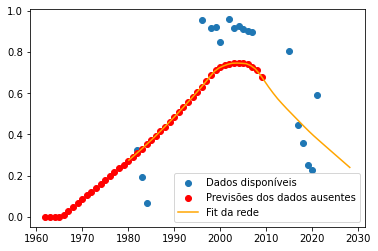

In [28]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

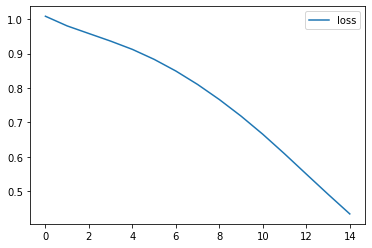

In [29]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [30]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Cam_rosa_ind 1962-2009',prev_continua)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
